In [1]:
import h5py
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import svm

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

np.random.seed(3108)

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np

#getwd
import os
cwd = os.getcwd()
print(cwd)


C:\Users\Patri\Desktop\DS_EO


In [3]:
# Directory dei file GeoJSON
data_dir = "data/GEE_our3months_6bands_3x3"

# Trova tutti i file .geojson nella directory
geojson_files = [os.path.join(data_dir, file) for file in os.listdir(data_dir) if file.endswith(".geojson")]

# Creare una lista di GeoDataFrame per ogni file senza aggiungere colonne extra
gdfs = []
for file in geojson_files:
    gdf = gpd.read_file(file)  # Leggi ogni file GeoJSON
    gdfs.append(gdf)

# Concatenare tutti i GeoDataFrame in uno solo
full_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

# Visualizzare i primi dati del GeoDataFrame
print(full_gdf.head())

# Visualizzare le dimensioni finali del GeoDataFrame
print(f"Dimensioni finali del GeoDataFrame: {full_gdf.shape}")

                       id                                              B11_1  \
0  0000000000000000050c_0  [ [ 0.31589999794960022, 0.31589999794960022, ...   
1  0000000000000000050d_0  [ [ 0.20379999279975891, 0.20379999279975891, ...   
2  0000000000000000050e_0  [ [ 0.2531999945640564, 0.2531999945640564, 0....   
3  0000000000000000050f_0  [ [ 0.3093000054359436, 0.3093000054359436, 0....   
4  00000000000000000511_0  [ [ 0.30430001020431519, 0.30430001020431519, ...   

                                               B11_3  \
0  [ [ 0.34424999356269836, 0.34424999356269836, ...   
1  [ [ 0.25734999775886536, 0.25734999775886536, ...   
2  [ [ 0.26635000109672546, 0.26635000109672546, ...   
3  [ [ 0.26510000228881836, 0.26510000228881836, ...   
4  [ [ 0.27709999680519104, 0.27709999680519104, ...   

                                               B11_7  \
0  [ [ 0.28600001335144043, 0.28600001335144043, ...   
1  [ [ 0.16795000433921814, 0.16795000433921814, ...   
2  [ [ 0.23000

In [ ]:
#

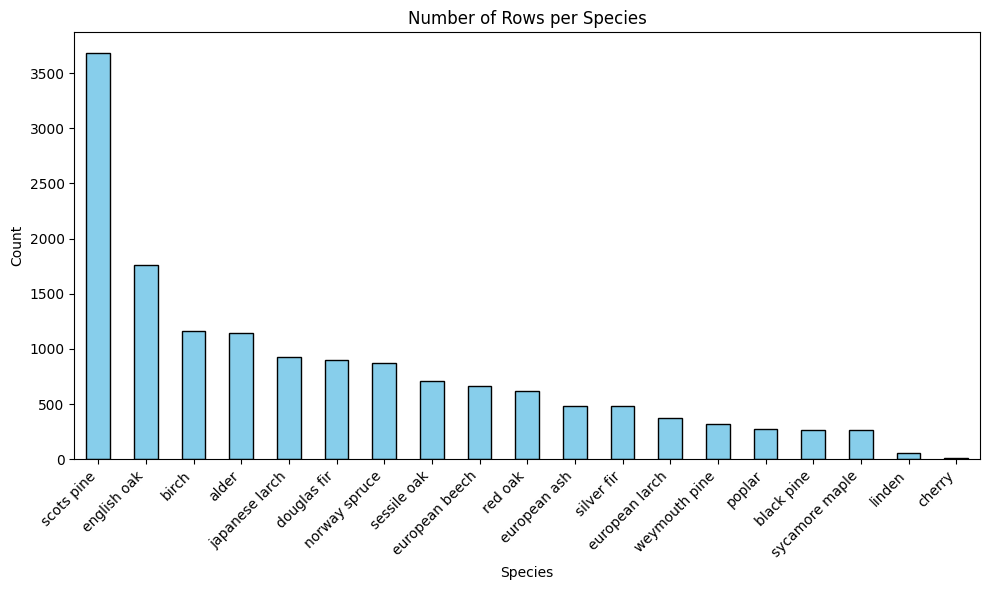

In [6]:
# Group by 'l3_species' and count the number of rows for each species
species_counts = full_gdf['l3_species'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
species_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Rows per Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent label clipping
plt.show()

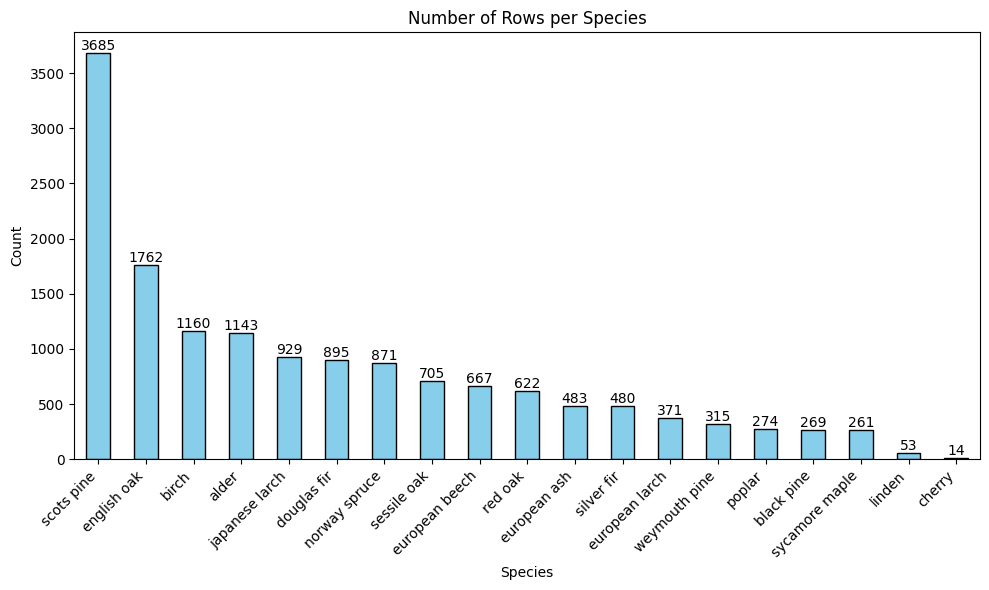

In [9]:
# Group by 'l3_species' and count the number of rows for each species
species_counts = full_gdf['l3_species'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = species_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add value labels on top of the bars
for i, count in enumerate(species_counts):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

# Set labels and title
plt.title('Number of Rows per Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent label clipping

# Show the plot
plt.show()

In [11]:
#uplod TreeSatAI.csv and count the species

# Load the CSV file into a DataFrame
file_path = "TreeSatAI.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# List of columns to analyze
columns = ["l1_leaf_types", "l2_genus", "l3_species"]

# Count occurrences for each column
species_counts = {col: df[col].value_counts() for col in columns}

# Print results
for col, counts in species_counts.items():
    print(f"=== Counts for {col} ===")
    print(counts)
    print("\n")

=== Counts for l1_leaf_types ===
l1_leaf_types
broadleaf     20843
needleleaf    17064
Name: count, dtype: int64


=== Counts for l2_genus ===
l2_genus
oak                      6383
pine                     6279
spruce                   5037
short-lived deciduous    4998
beech                    4756
long-lived deciduous     4706
larch                    2752
douglas fir              2185
fir                       811
Name: count, dtype: int64


=== Counts for l3_species ===
l3_species
scots pine        5389
norway spruce     5037
european beech    4756
english oak       2808
birch             2468
european ash      2202
douglas fir       2185
alder             2143
sessile oak       2115
sycamore maple    2096
japanese larch    1613
red oak           1460
european larch    1139
silver fir         811
weymouth pine      478
black pine         412
poplar             387
cherry             247
linden             161
Name: count, dtype: int64




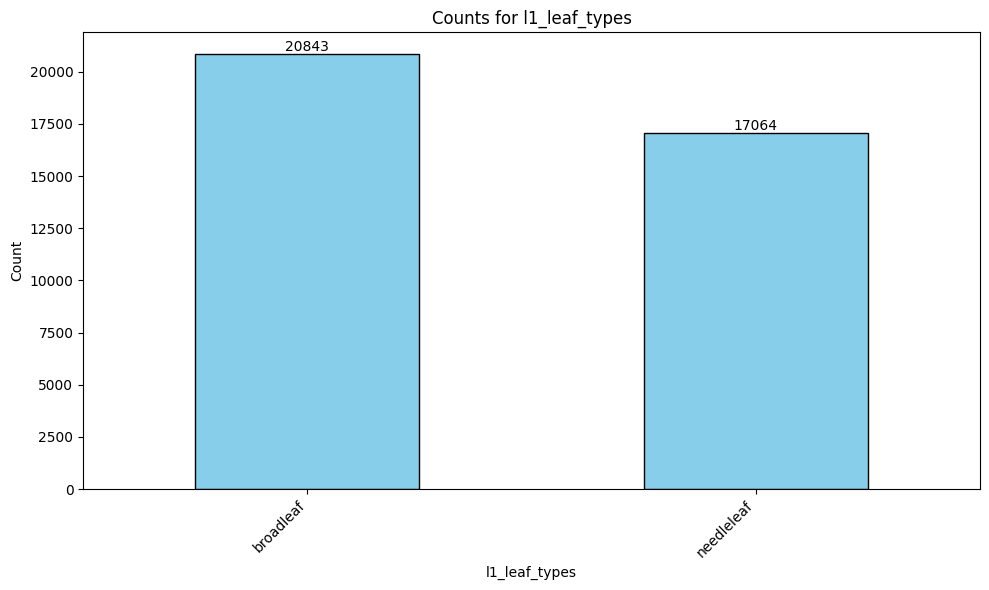

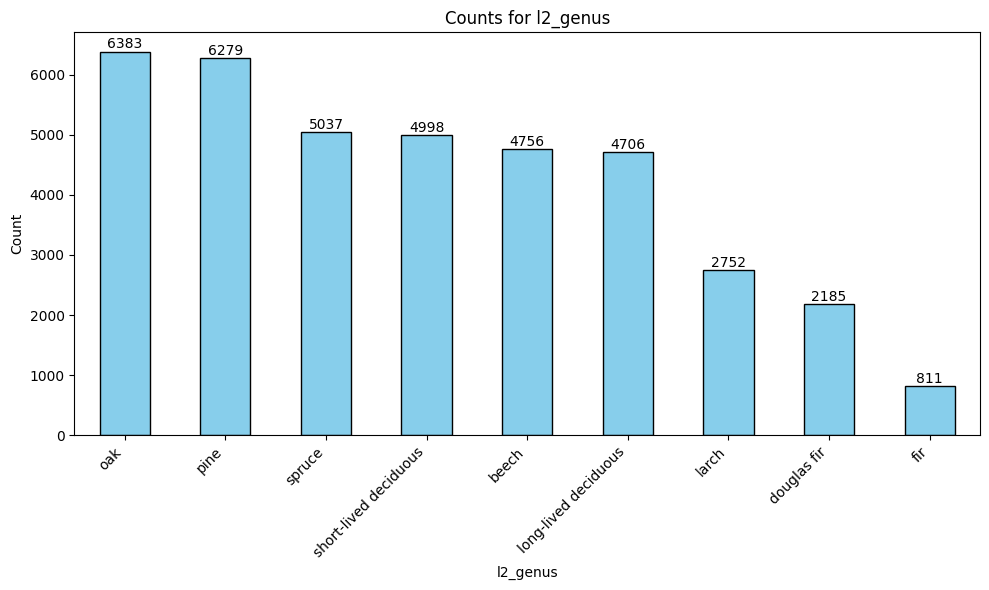

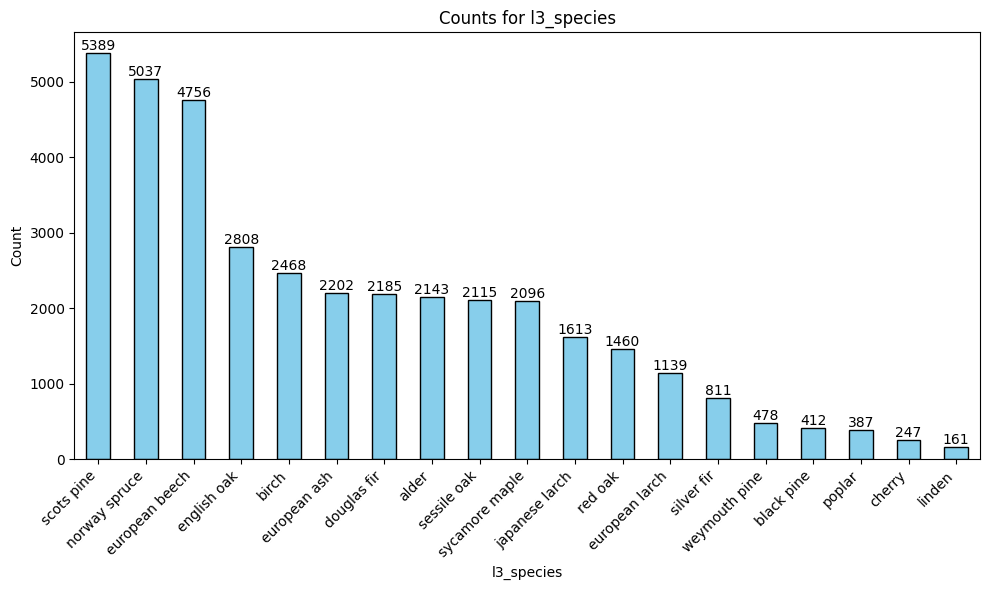

In [13]:
# load TreeSatAI -count species - create plot
file_path = "TreeSatAI.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# List of columns to analyze
columns = ["l1_leaf_types", "l2_genus", "l3_species"]

# Count occurrences for each column and plot separately
for col in columns:
    counts = df[col].value_counts()
    
    # Create a new figure for each column
    plt.figure(figsize=(10, 6))
    ax = counts.plot(kind="bar", color="skyblue", edgecolor="black")
    
    # Add count values on top of the bars
    for i, count in enumerate(counts):
        ax.text(i, count + 0.5, str(count), ha="center", va="bottom", fontsize=10)
    
    # Set labels and title
    plt.title(f"Counts for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    
    plt.tight_layout()  # Adjust layout to fit labels
    plt.show()

In [4]:
#save
# Save the concatenated GeoDataFrame as a GeoJSON file
full_gdf.to_file('data/merged_data_our3months_6bands_3x3.geojson', driver='GeoJSON')
